In [18]:
from sklearn.metrics import mutual_info_score

# from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
import seaborn as sns
import pandas as pd

# Mathematical Underpinnings - Lab 5

Tests to verify hipoteses of independence (from Lab 4):

In [4]:
def indep_test_asymptotic(X, Y, stat):

    if stat == "mi":

        stat_value = 2 * len(X) * mutual_info_score(X, Y)

    if stat == "chi2":

        test_res = chi2_contingency(pd.crosstab(X, Y))
        stat_value = test_res.statistic

    df = (len(np.unique(X)) - 1) * (len(np.unique(Y)) - 1)

    p_value = 1 - chi2.cdf(stat_value, df=df)

    return stat_value, p_value


def indep_test_permutation(X, Y, B, stat="mi"):

    stat_value = mutual_info_score(X, Y)

    condition_p_value = 0
    for b in range(B):
        X_b = np.random.permutation(X)

        stat_value_b = mutual_info_score(X_b, Y)

        if stat_value <= stat_value_b:
            condition_p_value += 1

    p_value = (1 + condition_p_value) / (1 + B)

    return 2 * len(X) * stat_value, p_value

## Task 1

In [56]:
# a function which computes CMI


def cond_mutual_info_score(X, Y, Z):
    cmi = 0
    Z_unique = np.unique(Z)
    for z_i in Z_unique:
        p = sum(np.array(Z == z_i)) / len(Z)
        cmi += p * mutual_info_score(X[Z == z_i], Y[Z == z_i])
    return cmi

### a)

In [57]:
# CI test based on CMI and asymptotics

def cond_indep_test_asymptotic(X, Y, Z):
    stat_value = 2 * len(X) * cond_mutual_info_score(X, Y, Z)
    df = (len(np.unique(X)) - 1) * (len(np.unique(Y)) - 1) * len(np.unique(Z))
    p_value = 1 - chi2.cdf(stat_value, df=df)
    return stat_value, p_value

### b)

In [58]:
# CI test based on CMI and permutations

def cond_indep_test_permutation(X, Y, Z, B):

    X_test = deepcopy(X)
    Z_unique = np.unique(Z)
    stat_value = cond_mutual_info_score(X_test, Y, Z)
    condition_p_value = 0
    
    for b in range(B):
        for z_i in Z_unique:
            X_test[Z == z_i] = np.random.permutation(X_test[Z == z_i])

        stat_value_b = cond_mutual_info_score(X_test, Y, Z)

        if stat_value <= stat_value_b:
            condition_p_value += 1

    p_value = (1 + condition_p_value) / (1 + B)

    return 2 * len(X) * stat_value, p_value

### c)

conditionaly independent

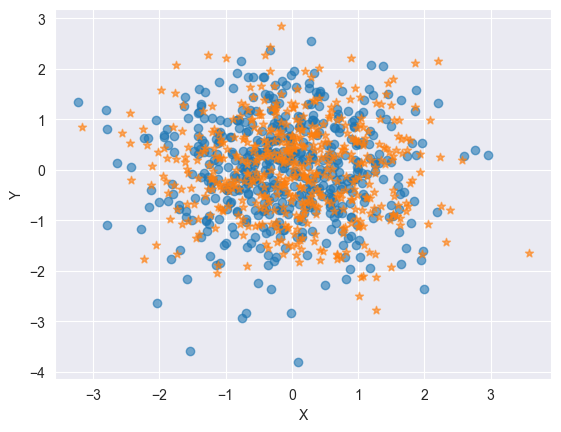

In [60]:
np.random.seed(123)

n = 1000
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
Z = np.random.randint(0, 2, n)


plt.scatter(X[Z == 0], Y[Z == 0], alpha=0.6, marker='o')
plt.scatter(X[Z == 1], Y[Z == 1], alpha=0.6, marker='*')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [61]:
bins = 10
X = np.digitize(X, np.linspace(np.min(X), np.max(X), bins))
Y = np.digitize(Y, np.linspace(np.min(Y), np.max(Y), bins))

In [62]:
cond_indep_test_asymptotic(X, Y, Z)

(108.20808859149756, 0.9996172530010706)

In [63]:
cond_indep_test_permutation(X, Y, Z, B=200)

(108.20808859149756, 0.5323383084577115)

conditionaly dependent

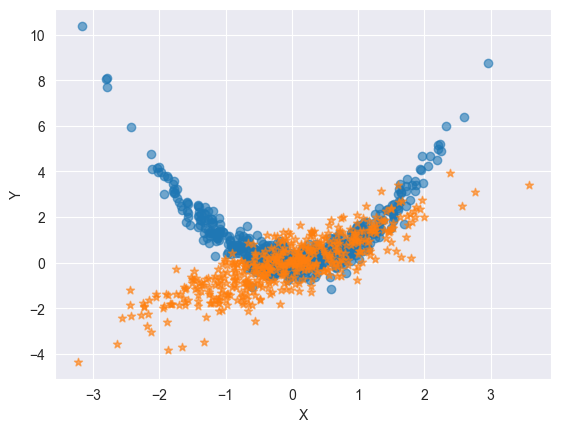

In [64]:
np.random.seed(123)

n = 1000
X = np.random.normal(0, 1, n)
Y = np.zeros(n)
Z = np.random.randint(0, 2, n)
Y[Z == 0] = X[Z == 0] ** 2 + np.random.normal(0, 0.4, sum(Z==0))
Y[Z == 1] = X[Z == 1] + np.random.normal(0, 0.7, sum(Z==1))


plt.scatter(X[Z == 0], Y[Z == 0], alpha=0.6, marker='o')
plt.scatter(X[Z == 1], Y[Z == 1], alpha=0.6, marker='*')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [65]:
bins = 10
X = np.digitize(X, np.linspace(np.min(X), np.max(X), bins))
Y = np.digitize(Y, np.linspace(np.min(Y), np.max(Y), bins))

In [66]:
cond_indep_test_asymptotic(X, Y, Z)

(998.129635272358, 0.0)

In [67]:
cond_indep_test_permutation(X, Y, Z, B=200)

(998.129635272358, 0.004975124378109453)